<a href="https://colab.research.google.com/github/Vinayak-Sharma12/LangGraph/blob/main/3_STATE(Pydantic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 10.7 MB/s eta 0:00:00


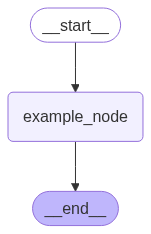

In [20]:
## Display
from IPython.display import Image, display
display (Image(graph.get_graph().draw_mermaid_png()))

STATE(PYDANTIC)

In [1]:
from pydantic import BaseModel
class State(BaseModel):
  message:str
  game:str

CREATING NODE

In [14]:
def example_node(state:State):
   return {"message":state.message+"Hello"}

GRAPH INVOKE

In [18]:
graph.invoke({"message":" ","game":" "})

{'message': ' Hello', 'game': ' '}

In [21]:
graph.invoke({"message":" "}) #Wrong

ValidationError: 1 validation error for State
game
  Field required [type=missing, input_value={'message': ' '}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

In [24]:
graph.invoke({"message":123,"game":" "})

ValidationError: 1 validation error for State
message
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type

EXAMPLE USUAGE

In [15]:
from langgraph.graph import StateGraph,START,END

builder=StateGraph(State)

#Add Node
builder.add_node("example_node",example_node)

#ADD EDGE
builder.add_edge(START,"example_node")
builder.add_edge("example_node",END)

#COMPILE
graph=builder.compile()

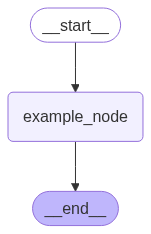

In [19]:
## Display
from IPython.display import Image, display
display (Image(graph.get_graph().draw_mermaid_png()))